In [54]:
import numpy as np
import matplotlib.pyplot as plt

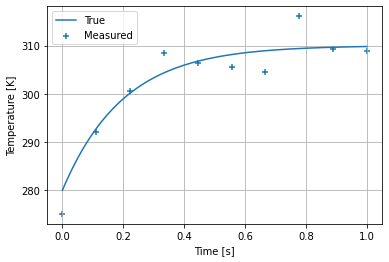

In [86]:
# True Values
T0 = 310.0
k = 5.0
t = np.linspace(0.0, 1.0, 500)
T = T0 + (280 - T0) * np.exp(-k * t)

# Measured Values (Ti is true)
ti = np.linspace(0.0, 1.0, 10)
Ti = T0 + (280 - T0) * np.exp(-k * ti)
Yi = np.random.normal(loc = Ti, scale = 3.0)

# Plot

plt.figure()

plt.plot(t, T, label = 'True')
plt.scatter(ti, Yi, label = 'Measured', marker='+')

plt.grid(True)
plt.xlabel('Time [s]')
plt.ylabel('Temperature [K]')
plt.legend()

In [87]:
# Initial Reference Trajectory

Xref0 = np.array([
    [ Yi[0]  ], # estimate of initial temperature
    [ Yi[-1] ], # estimate of final temperature
    [ 1.0    ]  # guess for k
])

# Iterate w.r.t. Reference Trajectory

for i in range(10):

    # Iterate in time

    t_past = 0.0
    t_now = 0.0
    Xref = np.copy(Xref0)
    phi = np.identity(3)
    Lambda = 0.0 * phi
    N = np.zeros((3, 1), dtype=float)

    for i in range(ti.size):
        # update time
        t_past = t_now
        t_now = ti[i]
        # update trajectory (single step of Forward Euler Method)
        Xref_dot = np.array([
            [ Xref[2, 0] * (Xref[1, 0] - Xref[0, 0]) ],
            [ 0.0                                    ],
            [ 0.0                                    ]
        ])
        A = np.array([
            [ -Xref[2, 0], Xref[2, 0], Xref[1, 0] - Xref[0, 0] ],
            [ 0.0,         0.0,        0.0                     ],
            [ 0.0,         0.0,        0.0                     ]
        ])
        phi_dot = A @ phi
        Xref += Xref_dot * (t_now - t_past)
        phi += phi_dot * (t_now - t_past)
        # accumulate current observation
        H_tilde_i = np.array([
            [ 1.0, 0.0, 0.0 ]
        ])
        y_i = Yi[i] - Xref[0, 0]
        H_i = H_tilde_i @ phi
        Lambda += H_i.transpose() @ H_i
        N += H_i.transpose() @ np.array([[y_i]])
        # for plotting

    # Update start of trajectory
    
    x0 = np.linalg.inv(Lambda) @ N
    Xref0 += x0

print('Estimates')
print(f'Initial Temperature [K]: {Xref0[0, 0]: .1f}')
print(f'External Termperature [K]: {Xref0[1, 0]: .1f}')
print(f'Cooling Constant [s^-1]: {Xref0[2, 0]: .2f}')

Estimates
Initial Temperature [K]:  275.0
External Termperature [K]:  309.5
Cooling Constant [s^-1]:  4.56


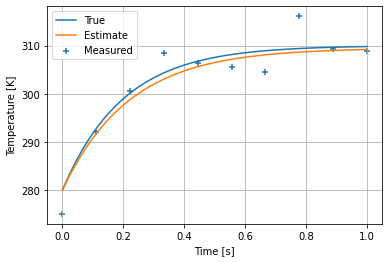

In [88]:
# a posteriori

T_est = Xref0[1, 0] + (280 - Xref0[1, 0]) * np.exp(-Xref0[2, 0] * t)

# Plot

plt.figure()

plt.plot(t, T, label = 'True')
plt.scatter(ti, Yi, label = 'Measured', marker='+')
plt.plot(t, T_est, label = 'Estimate')


plt.grid(True)
plt.xlabel('Time [s]')
plt.ylabel('Temperature [K]')
plt.legend()